# Multilabel Image Classification for Movie Posters Dataset

Importing Libraries

In [1]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

In [3]:
#Loading Dataset
import pandas as pd
train = pd.read_csv('Movies-Poster_Dataset-master/train.csv')
train.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [4]:
train.columns

Index(['Id', 'Genre', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'N/A', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [5]:
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('Movies-Poster_Dataset-master/Images/'+train['Id'][i]+'.jpg',target_size=(224,224,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)

100%|██████████| 7254/7254 [00:34<00:00, 211.23it/s]


In [5]:
X = np.array(train_image)

In [6]:
X.shape

(7254, 224, 224, 3)

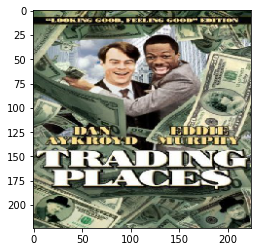

In [7]:
plt.imshow(X[5])

In [8]:
train['Genre'][5]

"['Comedy']"

In [9]:
y = np.array(train.drop(['Id', 'Genre'],axis=1))
y.shape

(7254, 25)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.15)

In [11]:
X_train[0].shape

(224, 224, 3)

CNN

In [12]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(25, activation='sigmoid'))

In [13]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)

Epoch 1/10
97/97 [==============================] - 353s 4s/step - loss: 0.3632 - accuracy: 0.1547 - val_loss: 0.2672 - val_accuracy: 0.1901
Epoch 2/10
97/97 [==============================] - 283s 3s/step - loss: 0.2793 - accuracy: 0.2221 - val_loss: 0.2521 - val_accuracy: 0.1901
Epoch 3/10
97/97 [==============================] - 283s 3s/step - loss: 0.2665 - accuracy: 0.2370 - val_loss: 0.2441 - val_accuracy: 0.1901
Epoch 4/10
97/97 [==============================] - 270s 3s/step - loss: 0.2588 - accuracy: 0.2430 - val_loss: 0.2421 - val_accuracy: 0.1901
Epoch 5/10
97/97 [==============================] - 229s 2s/step - loss: 0.2554 - accuracy: 0.2629 - val_loss: 0.2403 - val_accuracy: 0.2130
Epoch 6/10
97/97 [==============================] - 229s 2s/step - loss: 0.2523 - accuracy: 0.2600 - val_loss: 0.2413 - val_accuracy: 0.2277
Epoch 7/10
97/97 [==============================] - 277s 3s/step - loss: 0.2499 - accuracy: 0.2829 - val_loss: 0.2381 - val_accuracy: 0.2902
Epoch 8/10
97

Drama (0.507)
Action (0.267)
Thriller (0.248)


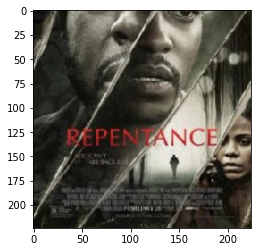

In [15]:




img = image.load_img('repentance.jpg',target_size=(224,224,3))
img = image.img_to_array(img)
img = img/255

classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,224,224,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)